In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os

In [27]:
plt.rcParams["figure.figsize"] = (15,12)

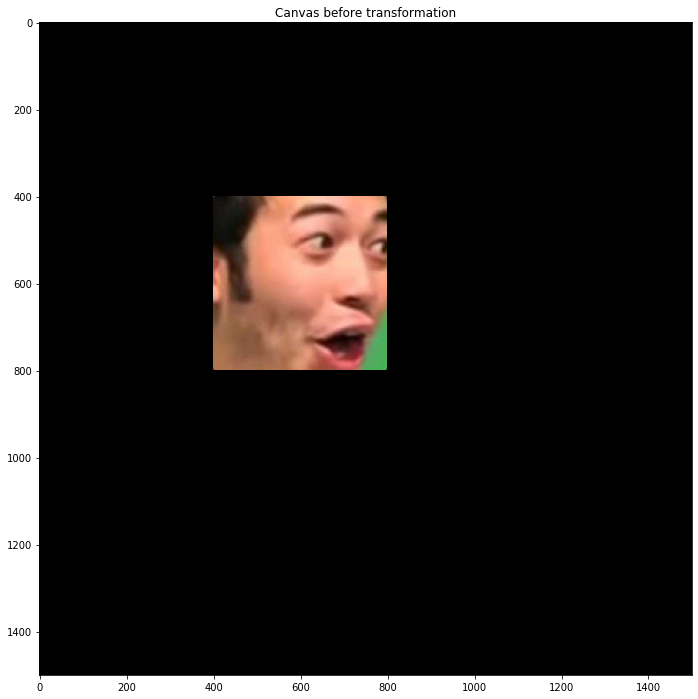

In [67]:
canvas = np.zeros((1500,1500,3),dtype='uint8')

impath = 'img/pog_400x400.jpg'
pogimg = Image.open(impath)
pogarr = np.array(pogimg)

pogy, pogx, _ = pogarr.shape
pogyoffset, pogxoffset = 400, 400

canvas_orig = canvas.copy()
canvas_orig[pogyoffset:pogy+pogyoffset,pogxoffset:pogx+pogxoffset] += pogarr


plt.imshow(canvas_orig)
plt.title('Canvas before transformation')
plt.savefig(f"dump/{impath[impath.rindex('/'):impath.index('.')]}_orig.png")
plt.show()

In [102]:
# example translation by 600px to right and 300px to bottom

# For X' = X + t method
t = np.array([600,300]).T # Translation vector
'''
thus X + t yields:
    x' = x + 600
    y' = y + 600
'''

# For X' = [I t] * X¯
# as X¯ is augmented point
t_2_3 = np.zeros((2,3))
t_2_3[:,:2] = np.identity(2)
t_2_3[:,2] = t
'''
t_2_3 = [1 0 600]
        [0 1 300]
        
thus t_2_3 @ X yields:
    x' = 1*x + 0*y + 600 = x + 600
    y' = 0*x + 1*y + 300 = y + 300
'''

# For X¯' = [I  t] * X¯
#           [0T 1]
# as X¯ is augmented point
t_3_3 = np.identity(3)
t_3_3[:2,2] = t
t_3_3[2,:2] = np.zeros((1,2))
'''
t_3_3 = [1 0 600]
        [0 1 300]
        [0 0 1  ]
        
thus t_3_3 @ X yields:
    x' = 1*x + 0*y + 600 = x + 600
    y' = 0*x + 1*y + 300 = y + 300
    w' = 0*x + 0*y + 1   = 1
    
Since w` is also 1, it is still considered augmented point though it can be replaced with homogenous point x~
'''

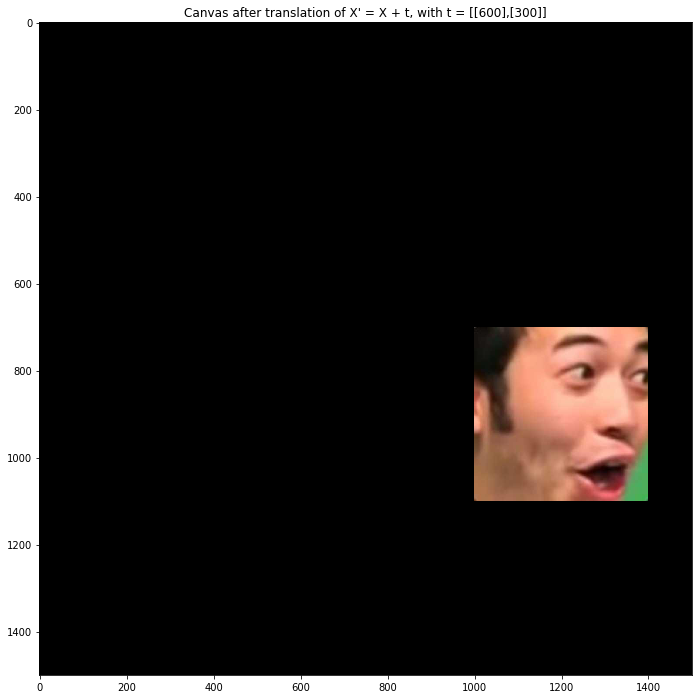

In [113]:
canvas_trans_01 = canvas.copy()
t_x, t_y = t
for y in range(pogyoffset,pogy+pogyoffset):
    y_nu = y + t_y
    for x in range(pogxoffset,pogx+pogxoffset):
        x_nu = x + t_x
        canvas_trans_01[y_nu,x_nu]=canvas_orig[y,x]

plt.imshow(canvas_trans_01)
plt.title('Canvas after translation of X\' = X + t, with t = [[600],[300]]')
plt.savefig(f"dump/{impath[impath.rindex('/'):impath.index('.')]}_trans_01.png")
plt.show()

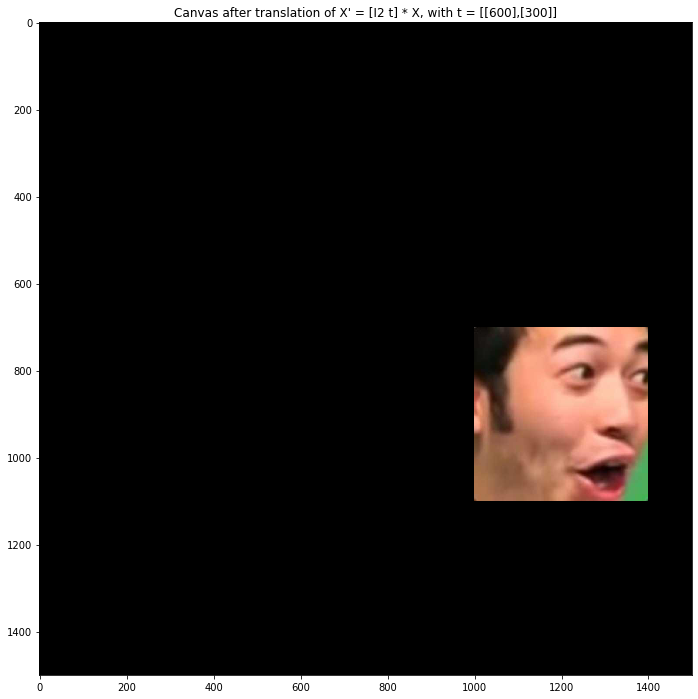

In [114]:
canvas_trans_02 = canvas.copy()
for y in range(pogyoffset,pogy+pogyoffset):
    for x in range(pogxoffset,pogx+pogxoffset):
        x_nu, y_nu = t_2_3 @ np.array([x, y, 1]).T
        canvas_trans_02[int(y_nu),int(x_nu)]=canvas_orig[y,x]

plt.imshow(canvas_trans_02)
plt.title('Canvas after translation of X\' = [I2 t] * X, with t = [[600],[300]]')
plt.savefig(f"dump/{impath[impath.rindex('/'):impath.index('.')]}_trans_02.png")
plt.show()

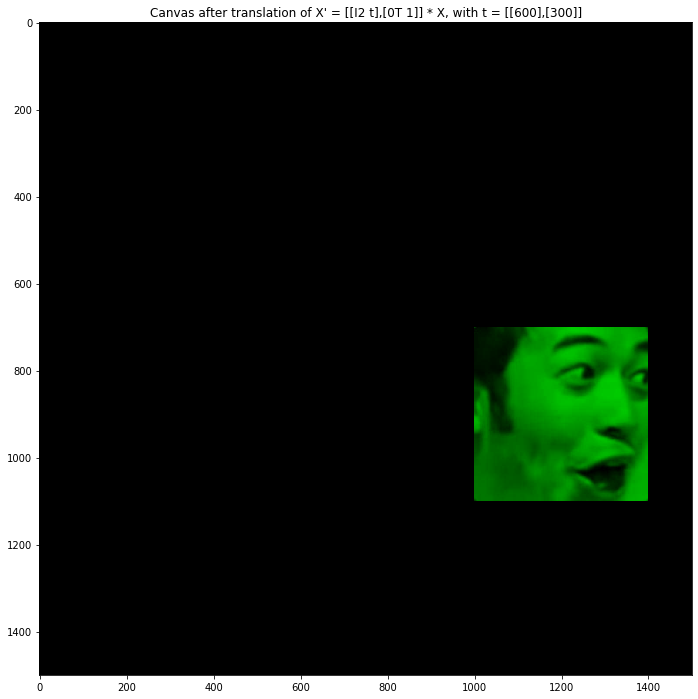

In [123]:
canvas_trans_03 = canvas.copy()
for y in range(pogyoffset,pogy+pogyoffset):
    for x in range(pogxoffset,pogx+pogxoffset):
        x_nu, y_nu, w_nu = t_3_3 @ np.array([x, y, 1]).T
        canvas_trans_03[int(y_nu),int(x_nu),int(w_nu)]=canvas_orig[y,x,1]

plt.imshow(canvas_trans_03)
plt.title('Canvas after translation of X\' = [[I2 t],[0T 1]] * X, with t = [[600],[300]]')
plt.savefig(f"dump/{impath[impath.rindex('/'):impath.index('.')]}_trans_03.png")
plt.show()

In [110]:
t_2_3 @ np.array([400, 400, 1]).T

array([1000.,  700.])

In [84]:
# https://mathworld.wolfram.com/AffineTransformation.html
def affine_rot_scale(xs,ys,xsoffset,ysoffset,scale=1,theta=0,xa=0,ya=0,canvas_orig=canvas_orig):
    rot_mat = np.array([
        [np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]
    ])
    canvas_affine = canvas.copy()
    for y in range(ysoffset,ys+ysoffset):
        for x in range(xsoffset,xs+xsoffset):
            nu_x, nu_y = \
                scale * \
                rot_mat @ \
                np.array([x-xa,y-ya]).T
            canvas_affine[int(nu_y),int(nu_x)] = canvas_orig[y,x]
    return canvas_affine

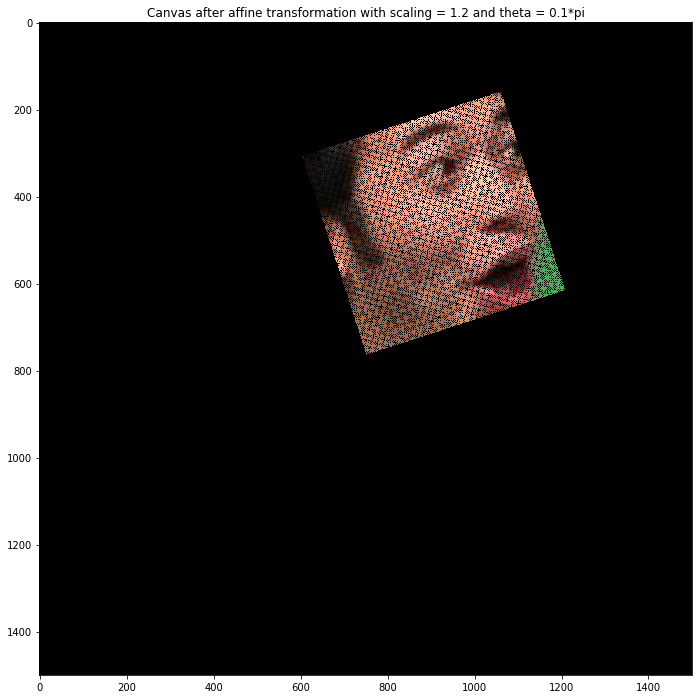

In [94]:
canvas_affine = affine_rot_scale(
    pogx,
    pogy,
    pogxoffset,
    pogyoffset,
    scale=1.2,
    theta=np.pi*0.1
)
plt.imshow(canvas_affine)
plt.title('Canvas after affine transformation with scaling = 1.2 and theta = 0.1*pi')
plt.savefig(f"dump/{impath[impath.rindex('/'):impath.index('.')]}_affine.png")
plt.show()

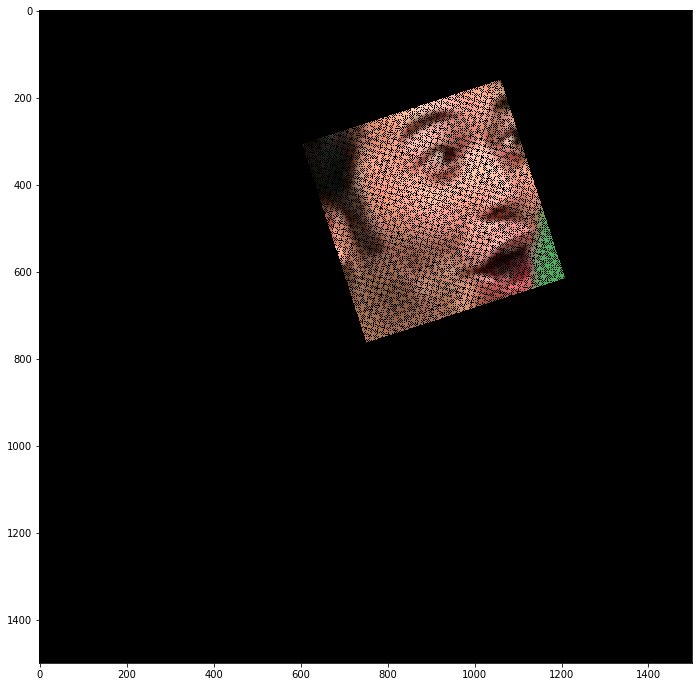

In [92]:
plt.imshow(res)